<a href="https://colab.research.google.com/github/ukishore33/Analysing-cost-of-insurance-claims-post-an-unforeseen-event/blob/main/Insurance_Claims_Unforeseen_Events.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
a=pd.read_csv('test.csv')

In [6]:
a.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000
mean,294067.153442,0.494447,0.506939,0.498255,0.492334,0.487640,0.492188,0.485945,0.487401,0.486015,0.498909,0.494360,0.494033,0.495086,0.495586
std,170098.335649,0.187961,0.206837,0.201746,0.210815,0.209119,0.205574,0.178650,0.199549,0.182134,0.185950,0.210399,0.210148,0.213108,0.222613
min,4.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.178568
25%,146414.250000,0.347403,0.358319,0.336963,0.327354,0.281143,0.336105,0.352087,0.317960,0.358970,0.364580,0.310961,0.318249,0.315758,0.294752
50%,294306.000000,0.475784,0.555782,0.527991,0.452887,0.422268,0.441525,0.438893,0.441060,0.441450,0.466720,0.457203,0.462286,0.363547,0.406104
75%,441800.000000,0.626630,0.681761,0.634224,0.652072,0.643315,0.659261,0.591284,0.629180,0.568890,0.619840,0.678924,0.682413,0.689974,0.724791
max,587634.000000,0.984975,0.862654,0.944251,0.956046,0.983107,0.997162,1.000000,0.982800,0.995400,0.994980,0.997830,0.997416,0.988494,0.844814


In [8]:
for c in a.columns:
  print('----%s----' % c)
  print(a[c].isnull().sum())

----id----
0
----cat1----
0
----cat2----
0
----cat3----
0
----cat4----
0
----cat5----
0
----cat6----
0
----cat7----
0
----cat8----
0
----cat9----
0
----cat10----
0
----cat11----
0
----cat12----
0
----cat13----
0
----cat14----
0
----cat15----
0
----cat16----
0
----cat17----
0
----cat18----
0
----cat19----
0
----cat20----
0
----cat21----
0
----cat22----
0
----cat23----
0
----cat24----
0
----cat25----
0
----cat26----
0
----cat27----
0
----cat28----
0
----cat29----
0
----cat30----
0
----cat31----
0
----cat32----
0
----cat33----
0
----cat34----
0
----cat35----
0
----cat36----
0
----cat37----
0
----cat38----
0
----cat39----
0
----cat40----
0
----cat41----
0
----cat42----
0
----cat43----
0
----cat44----
0
----cat45----
0
----cat46----
0
----cat47----
0
----cat48----
0
----cat49----
0
----cat50----
0
----cat51----
0
----cat52----
0
----cat53----
0
----cat54----
0
----cat55----
0
----cat56----
0
----cat57----
0
----cat58----
0
----cat59----
0
----cat60----
0
----cat61----
0
----cat62----
0
----

In [9]:
for c in a.columns:
  print('----%s----' % c)
  print(a[c].nunique())

----id----
125546
----cat1----
2
----cat2----
2
----cat3----
2
----cat4----
2
----cat5----
2
----cat6----
2
----cat7----
2
----cat8----
2
----cat9----
2
----cat10----
2
----cat11----
2
----cat12----
2
----cat13----
2
----cat14----
2
----cat15----
2
----cat16----
2
----cat17----
2
----cat18----
2
----cat19----
2
----cat20----
2
----cat21----
2
----cat22----
2
----cat23----
2
----cat24----
2
----cat25----
2
----cat26----
2
----cat27----
2
----cat28----
2
----cat29----
2
----cat30----
2
----cat31----
2
----cat32----
2
----cat33----
2
----cat34----
2
----cat35----
2
----cat36----
2
----cat37----
2
----cat38----
2
----cat39----
2
----cat40----
2
----cat41----
2
----cat42----
2
----cat43----
2
----cat44----
2
----cat45----
2
----cat46----
2
----cat47----
2
----cat48----
2
----cat49----
2
----cat50----
2
----cat51----
2
----cat52----
2
----cat53----
2
----cat54----
2
----cat55----
2
----cat56----
2
----cat57----
2
----cat58----
2
----cat59----
2
----cat60----
2
----cat61----
2
----cat62----
2

In [10]:
b=pd.read_csv('train.csv')

In [11]:
for c in b.columns:
  print('----%s----' % c)
  print(b[c].isnull().sum())

----id----
0
----cat1----
0
----cat2----
0
----cat3----
0
----cat4----
0
----cat5----
0
----cat6----
0
----cat7----
0
----cat8----
0
----cat9----
0
----cat10----
0
----cat11----
0
----cat12----
0
----cat13----
0
----cat14----
0
----cat15----
0
----cat16----
0
----cat17----
0
----cat18----
0
----cat19----
0
----cat20----
0
----cat21----
0
----cat22----
0
----cat23----
0
----cat24----
0
----cat25----
0
----cat26----
0
----cat27----
0
----cat28----
0
----cat29----
0
----cat30----
0
----cat31----
0
----cat32----
0
----cat33----
0
----cat34----
0
----cat35----
0
----cat36----
0
----cat37----
0
----cat38----
0
----cat39----
0
----cat40----
0
----cat41----
0
----cat42----
0
----cat43----
0
----cat44----
0
----cat45----
0
----cat46----
0
----cat47----
0
----cat48----
0
----cat49----
0
----cat50----
0
----cat51----
0
----cat52----
0
----cat53----
0
----cat54----
0
----cat55----
0
----cat56----
0
----cat57----
0
----cat58----
0
----cat59----
0
----cat60----
0
----cat61----
0
----cat62----
0
----

In [12]:
for c in b.columns:
  print('----%s----' % c)
  print(b[c].nunique())

----id----
188318
----cat1----
2
----cat2----
2
----cat3----
2
----cat4----
2
----cat5----
2
----cat6----
2
----cat7----
2
----cat8----
2
----cat9----
2
----cat10----
2
----cat11----
2
----cat12----
2
----cat13----
2
----cat14----
2
----cat15----
2
----cat16----
2
----cat17----
2
----cat18----
2
----cat19----
2
----cat20----
2
----cat21----
2
----cat22----
2
----cat23----
2
----cat24----
2
----cat25----
2
----cat26----
2
----cat27----
2
----cat28----
2
----cat29----
2
----cat30----
2
----cat31----
2
----cat32----
2
----cat33----
2
----cat34----
2
----cat35----
2
----cat36----
2
----cat37----
2
----cat38----
2
----cat39----
2
----cat40----
2
----cat41----
2
----cat42----
2
----cat43----
2
----cat44----
2
----cat45----
2
----cat46----
2
----cat47----
2
----cat48----
2
----cat49----
2
----cat50----
2
----cat51----
2
----cat52----
2
----cat53----
2
----cat54----
2
----cat55----
2
----cat56----
2
----cat57----
2
----cat58----
2
----cat59----
2
----cat60----
2
----cat61----
2
----cat62----
2

- As we can see that the data cleaning part of this data science project already done as there are no null values, no duplicates, etc., we can directly move on to Feauture engineering part and after that Machine Learning Steps.

#### Feauture Engineering

Firstly we can start with a simple checking of correlation between columns.

<ipython-input-13-8815afe1290a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df=a.corr()


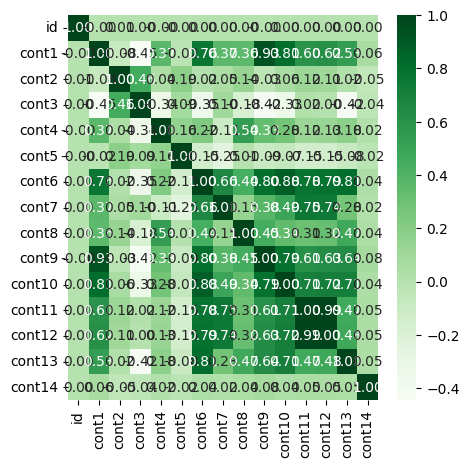

In [13]:
corr_df=a.corr()

plt.figure(figsize = (5,5))
sns.heatmap(data = corr_df, annot = True, cmap = "Greens", cbar = True, fmt='.2f')
plt.show()

<ipython-input-14-1db4bf6bbaa7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df=b.corr()


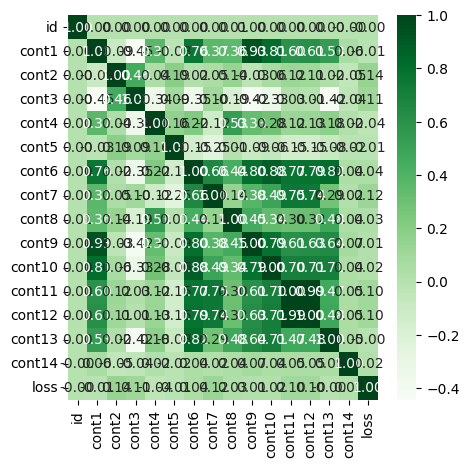

In [14]:
corr_df=b.corr()

plt.figure(figsize = (5,5))
sns.heatmap(data = corr_df, annot = True, cmap = "Greens", cbar = True, fmt='.2f')
plt.show()

Test Data Label Encoding

In [15]:
# Import the necessary libraries
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Define the columns to exclude from label encoding and VIF calculation
columns_to_exclude = ['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'cont15', 'cont16']

# Apply label encoding to all columns except the excluded ones
c = a.copy()  # Create a copy of the DataFrame
columns_to_encode = [col for col in a.columns if col not in columns_to_exclude]
c[columns_to_encode] = a[columns_to_encode].apply(LabelEncoder().fit_transform)




Train Data Label Encoding

In [16]:
# Import the necessary libraries
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Define the columns to exclude from label encoding and VIF calculation
columns_to_exclude = ['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'cont15', 'cont16','loss']

# Apply label encoding to all columns except the excluded ones
d = b.copy()  # Create a copy of the DataFrame
columns_to_encode = [col for col in a.columns if col not in columns_to_exclude]
d[columns_to_encode] = b[columns_to_encode].apply(LabelEncoder().fit_transform)



## Train/Test /x/y split


In [17]:
Test_Data=c

In [18]:
Train_Data=d
Train_Data

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,0,0,1,0,1,0,0,0,0,1,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,1,0,1,0,0,0,0,0,0,1,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,2,0,1,0,0,1,0,0,0,1,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,3,1,1,0,1,0,0,0,0,1,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,4,0,1,0,1,0,0,0,0,1,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,188313,0,1,0,0,0,0,0,0,1,...,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62
188314,188314,0,0,0,0,0,1,0,0,0,...,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34
188315,188315,0,1,0,0,0,0,0,1,1,...,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,5762.64
188316,188316,0,1,0,0,0,0,0,0,1,...,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707,1562.87


In [19]:
X_train = Train_Data.drop(columns = ['loss'],axis = 0)
X_train

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,0,1,0,1,0,0,0,0,1,...,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,1,0,1,0,0,0,0,0,0,1,...,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,2,0,1,0,0,1,0,0,0,1,...,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,3,1,1,0,1,0,0,0,0,1,...,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,4,0,1,0,1,0,0,0,0,1,...,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,188313,0,1,0,0,0,0,0,0,1,...,0.939556,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216
188314,188314,0,0,0,0,0,1,0,0,0,...,0.704268,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872
188315,188315,0,1,0,0,0,0,0,1,1,...,0.482436,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888
188316,188316,0,1,0,0,0,0,0,0,1,...,0.340543,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707


In [20]:
y_train = Train_Data['loss']
y_train

0         2213.18
1         1283.60
2         3005.09
3          939.85
4         2763.85
           ...   
188313    1198.62
188314    1108.34
188315    5762.64
188316    1562.87
188317    4751.72
Name: loss, Length: 188318, dtype: float64

As the Scaling is already done in this dataset, we can move directly to building the algorithms

## Machine Learning

Based on the problem statement, we can understand that we should do the analysis based on Regression based algorithms.

### Building the Algorithm

Linear Regression

In [41]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

Decision Tree Regression

In [42]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

Multiple linear Regression

In [43]:
# Create an instance of the Linear Regression model
linear_regression = LinearRegression()

# Fit the model to the training data
linear_regression.fit(X_train, y_train)



# Evaluate the model
##linear_mse = mean_squared_error(y_test, linear_predictions)
##linear_r2 = r2_score(y_test, linear_predictions)

# Print the evaluation metrics
##print("Linear Regression MSE:", linear_mse)
##print("Linear Regression R-squared:", linear_r2)


LinearRegression()

## Making Predictions

Linear Regression

In [49]:
linear_pred = linear_reg.predict(Test_Data)

Decision Tree Regression

In [50]:
dt_pred =dt_reg.predict(Test_Data)

Multiple linear Regression

In [53]:
linear_predictions = linear_regression.predict(Test_Data)